# Part I - Ford GoBike System Data Exploration
## by Chukwudi Chidubem

## Introduction
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [151]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [152]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [153]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [154]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Wrangling

In [155]:
#Converting the start_time and end_time from object to date-time datatypes
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])


In [156]:
#Converting start and end station ids from float to str
bike_df['start_station_id'] = bike_df['start_station_id'].astype(str)
bike_df['end_station_id'] = bike_df['end_station_id'].astype(str)

In [157]:
#Converting user_type and member_gender into a category dtype
bike_df['user_type'] = bike_df['user_type'].astype('category')
bike_df['member_gender'] = bike_df['member_gender'].astype('category')

In [158]:
#Removing all NAN values
bike_df.dropna(inplace=True)

In [159]:
#Converting the member_birth_year to an integer datatype
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype('int64')

#### Feature Engineering

In [160]:
#Here we are going to calculate the member's age from the birthyear
bike_df['member_age'] = 2019 - bike_df['member_birth_year']
bike_df['member_age'] = bike_df['member_age'].astype(int)

### What is the structure of your dataset?

> The dataset was made up of 183412 rows representing the number of trips and 16 columns representing variables but after some data wrangling was applied the data is now made up of 174952 rows and 16 columns. The variables presented in the dataset are:
- duration_sec (int dtype)
- start_time (datetime dtype)
- end_time (datetime dtype)
- start_station_id (float dtype)
- start_station_name (object dtype)
- start_station_latitude (float dtype)
- start_station_longitude (float dtype)
- end_station_id (float dtype)
- end_station_name (object dtype)
- end_station_latitude (float dtype)
- end_station_longitude (float dtype)
- bike_id (int dtype)
- user_type (object dtype)
- member_birth_year (int dtype)
- member_gender (category dtype)
- bike_share_for_all_trip (object dtype)

### What is/are the main feature(s) of interest in your dataset?

> I am really interested if the trip duration is dependent on the other features in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start_stations and end_stations will be of great help. I also expect the member_gender, member_age and the user_type to be helpful too. 

## Univariate Exploration

> I will start by looking at the distribution of the main variable of interest which is the duration_sec variable


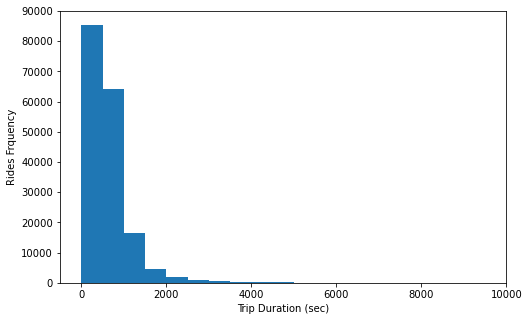

In [161]:
# Let's start with a standard histogram
binsize = 500
bins = np.arange(0, bike_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x='duration_sec', bins = bins);
plt.xlabel('Trip Duration (sec)');
plt.ylabel('Rides Frquency');
plt.axis([-500, 10000, 0, 90000])
plt.show()

In [162]:
np.log10(bike_df['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_3092\2589515439.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 14000]);


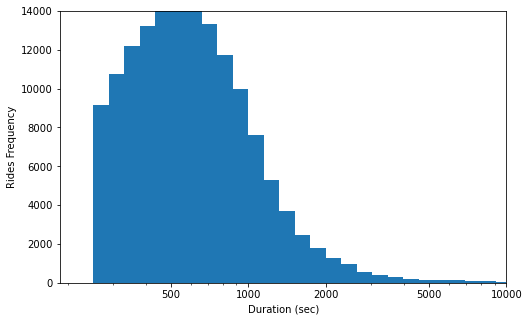

In [163]:
# The distribution doesn't tell us much about the variable, so let's put it on a log scale instead
log_binsize = 0.06
bins = 10 ** np.arange(2.4, np.log10(bike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data=bike_df, x='duration_sec', bins = bins);
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4],[500, 1000, 2000, 5000, 10000, 20000]);
plt.axis([0, 10000, 0, 14000]);
plt.xlabel('Duration (sec)');
plt.ylabel('Rides Frequency');
plt.show()

The trip duration is skewed to the right, with a lot of trips having short durations and a few having long durations. When plotted on a log-scale, the price distribution peaks at around 500 seconds and begins to fall at 1100.

Next, the first predictor variable of interest: start and end stations

In [164]:
#Getting the 15 most common start stations
start_station_counts = bike_df['start_station_name'].value_counts().reset_index(name='no. of trips')[:15]
start_station_order = start_station_counts['index']
start_station_sub = bike_df.loc[bike_df['start_station_name'].isin(start_station_order)]

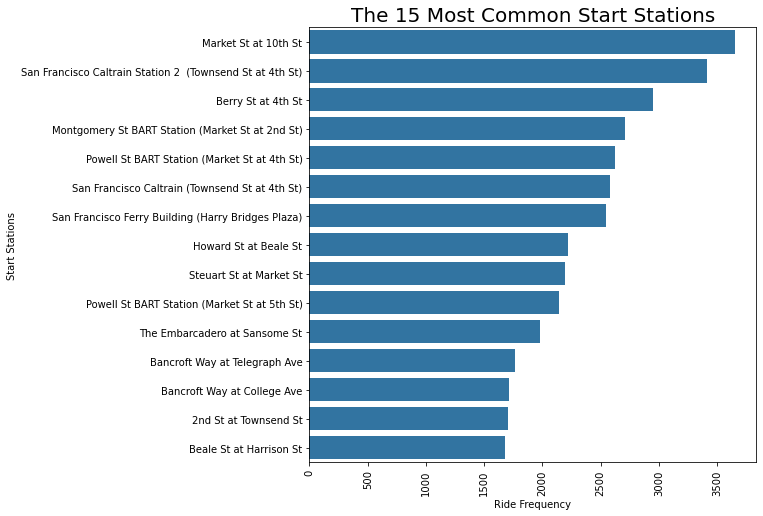

In [165]:
# Plotting for start station  
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 8])

sb.countplot(data=start_station_sub, y='start_station_name', color=base_color, order=start_station_order)
plt.xticks(rotation=90)
plt.ylabel('Start Stations');
plt.xlabel('Ride Frequency');
plt.title('The 15 Most Common Start Stations', size=20);

In [166]:
#Getting the 15 most common end stations
end_station_counts = bike_df['end_station_name'].value_counts().reset_index(name='no. of trips')[:15]
end_station_order = end_station_counts['index']
end_station_sub = bike_df.loc[bike_df['end_station_name'].isin(end_station_order)]

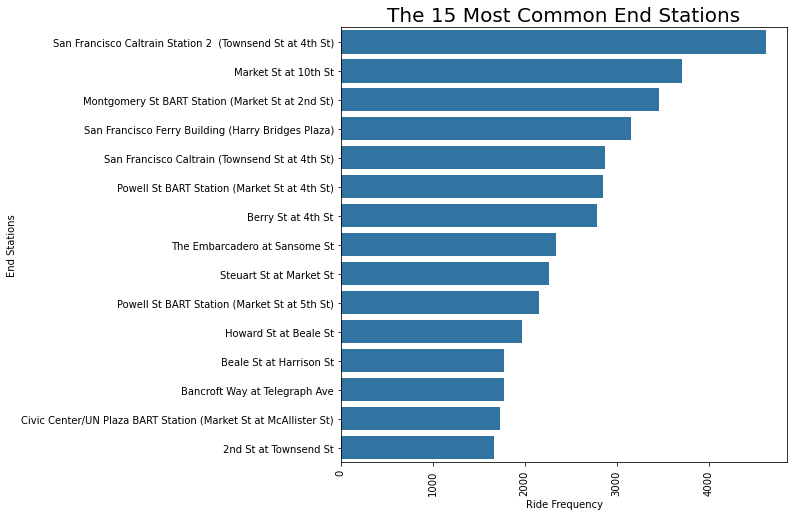

In [167]:
# Plotting for end station 
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 8])

sb.countplot(data=end_station_sub, y='end_station_name', color=base_color, order=end_station_order)
plt.xticks(rotation=90)
plt.ylabel('End Stations');
plt.xlabel('Ride Frequency');
plt.title('The 15 Most Common End Stations', size=20);

In [168]:
#Getting the number of stations that are most common in both start and end 
(end_station_order.isin(start_station_order)).sum()

14

From the Visualizations above, we can see that the most common start stations are also the most common end stations with San Francisco Caltrain station 2(Townsend St at 4th St) and Market St at 10th St being the most popular stations.

Next up, we will take a look at three other predictor variables of interest namely; Member_age, member_gender and user_type.

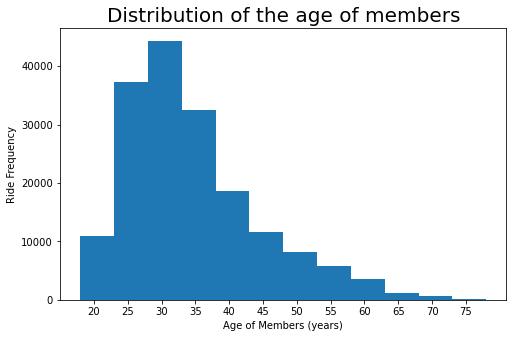

In [169]:
# Plotting for member_age
plt.figure(figsize=[8, 5])
bins = np.arange(18, 81, 5)

plt.hist(data=bike_df, x='member_age', bins=bins);
plt.xlabel('Age of Members (years)');
plt.xticks(np.arange(20, 80, 5));
plt.ylabel('Ride Frequency');
plt.title('Distribution of the age of members', size=20);

From the visualization above, we can see that most users are between the age of 25 - 45 years old 

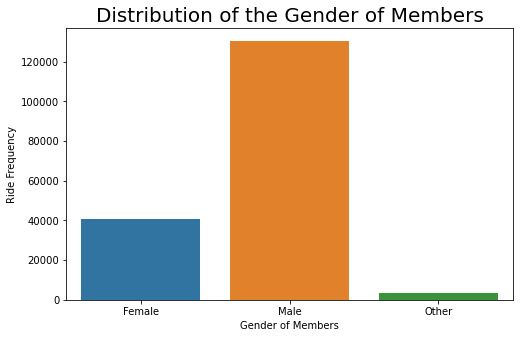

In [170]:
# plotting for member_gender
plt.figure(figsize=[8, 5])
sb.countplot(data=bike_df, x='member_gender');
plt.xlabel('Gender of Members');
plt.ylabel('Ride Frequency');
plt.title('Distribution of the Gender of Members', size=20);

From the Visualization above, it can be seen that most of the users are **Males** with other genders having the least number of users.

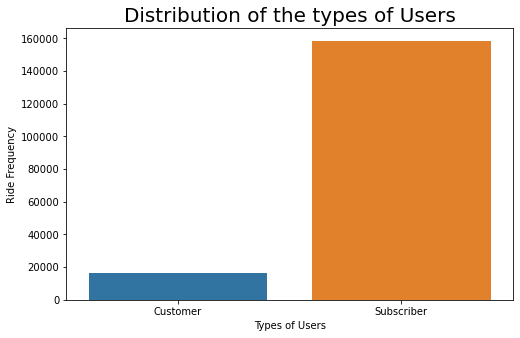

In [171]:
# plotting for user_type
plt.figure(figsize=[8, 5])
sb.countplot(data=bike_df, x='user_type');
plt.xlabel('Types of Users');
plt.ylabel('Ride Frequency');
plt.title('Distribution of the types of Users', size=20);

From the Visualization above, it can be seen that most of the users are **Subscribers**. Also, the number of subscribers is nearly 10 times the number of customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the Trip duration, simply plotting it wasn't good enough because it didn't give much information about the distribution and it couldn't be interpreted easily. So I used Logarithmic scale trnasformation and added a X and Y limit to focus on the most frequent durations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions but I did some feature engineering to get the member's age. Then I also had to convert the user_type and member_gender to a category datatype.
> Also, it was discovered that most users are male, subscribers and are between the age of 25 - 40 years old

## Bivariate Exploration

> In this section, I will investigate relationships between my dependent variable (duration_sec) and other predictor variables.

First,I will look at the relationship between the trip duration and start and end stations.

In [172]:
# Before I plot the relationship I will find the 15 longest mean trip durations for both the start and end stations
start_duration_mean = bike_df[['start_station_name', 'duration_sec']].groupby(['start_station_name']).mean()
start_duration_ordered = start_duration_mean.sort_values(['duration_sec'], ascending=False)
longest_start_duration = pd.DataFrame(start_duration_ordered).reset_index().head(15)

In [173]:
end_duration_mean = bike_df[['end_station_name', 'duration_sec']].groupby(['end_station_name']).mean()
end_duration_ordered = end_duration_mean.sort_values(['duration_sec'], ascending=False)
longest_end_duration = pd.DataFrame(end_duration_ordered).reset_index().head(15)

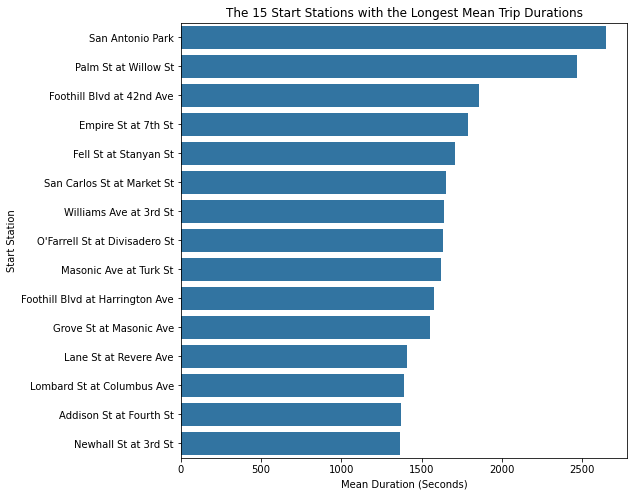

In [174]:
#plotting for start station
plt.figure(figsize=[8,8])

sb.barplot(data=longest_start_duration, y='start_station_name', x='duration_sec', color=base_color);
plt.ylabel('Start Station', size=10);
plt.xlabel('Mean Duration (Seconds)', size=10);
plt.title('The 15 Start Stations with the Longest Mean Trip Durations');

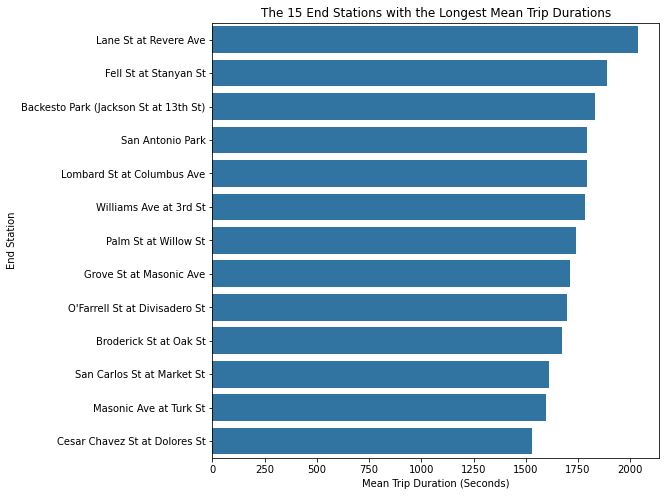

In [175]:
# plotting for end stations
plt.figure(figsize=[8,8])

sb.barplot(data=longest_end_duration[2:], y='end_station_name', x='duration_sec', color=base_color);
plt.ylabel('End Station', size=10);
plt.xlabel('Mean Trip Duration (Seconds)', size=10);
plt.title('The 15 End Stations with the Longest Mean Trip Durations');

In [176]:
longest_start_duration['start_station_name'].isin(longest_end_duration['end_station_name']).sum()

10

From the plots above, we can observe that most of the start stations with the longest mean duration are also the end stations with the longest mean duration. 

Next up, I will look at the relationship between the trip duration and the age of the members.

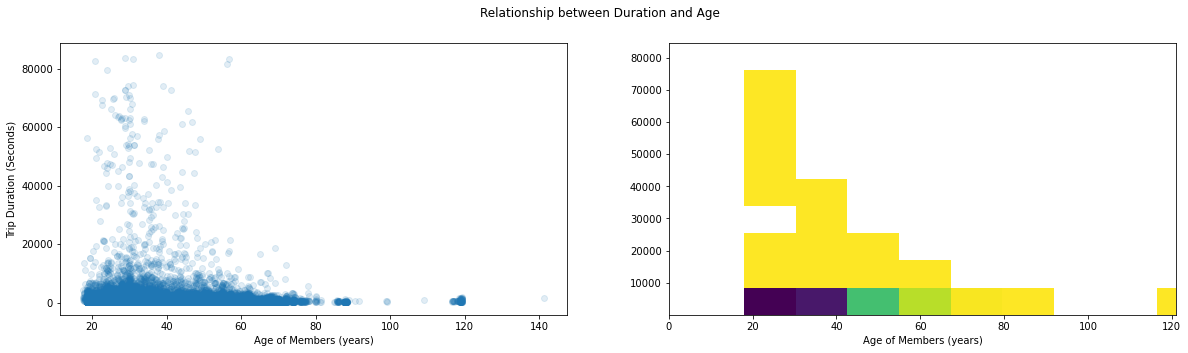

In [177]:
#using subplot to create two plots of the relationship simultaneously for clear interpretations
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=bike_df, x='member_age', y='duration_sec', fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/8});
plt.xlabel('Age of Members (years)');
plt.ylabel('Trip Duration (Seconds)');

plt.subplot(1, 2, 2)
plt.hist2d(data=bike_df, x='member_age', y='duration_sec', cmin=10, cmap='viridis_r');
plt.xlabel('Age of Members (years)');
plt.xlim(0, 121);
plt.suptitle('Relationship between Duration and Age');

From the plots above we can see that there is a weak negative correlation in the relationship between the Trip Duration and the age of members. But we can also see that generally most of the users don't have long trip durations. We can also see that most old people don't have long trip durations meaning they don't embark on long trips with the bikes. Meanwhile, the majority of people that have long trip durations are young people. There are also outliers.

Now, let's look at the relationship between the user type and the Trip Duration

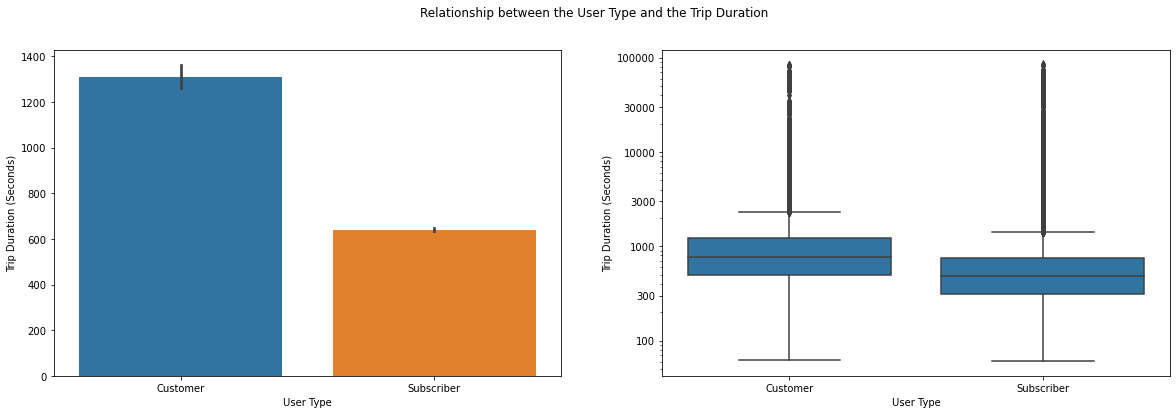

In [178]:
plt.figure(figsize=[20, 6])

plt.subplot(1, 2, 1)
sb.barplot(data=bike_df, x='user_type', y='duration_sec');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Seconds)');

plt.subplot(1, 2, 2)
sb.boxplot(data=bike_df, x='user_type', y='duration_sec', color=base_color);
plt.yscale('log');
y_ticklocs = [100, 300,  1e3, 3e3, 1e4, 3e4, 1e5]
y_ticklabels = [100, 300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(y_ticklocs, y_ticklabels);
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Seconds)');
plt.suptitle('Relationship between the User Type and the Trip Duration');




From the plots above, It is seen that Customers spend more time with the bikes than subscribers. Also there are alot of outliers in the dataset.

Finally, let's take a look at the relationship between the Trip duration and the genders of the members.

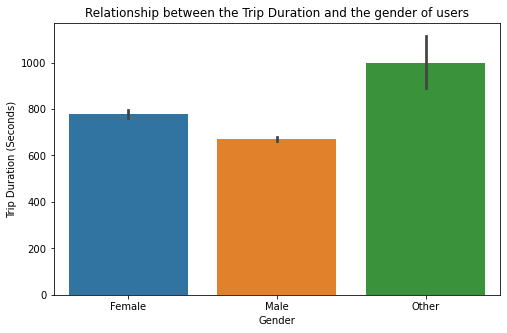

In [179]:
plt.figure(figsize=[8, 5])

sb.barplot(data=bike_df, x='member_gender', y='duration_sec');
plt.xlabel('Gender');
plt.ylabel('Trip Duration (Seconds)');
plt.title('Relationship between the Trip Duration and the gender of users');


From the plot above, it can be observed that the **Other** gender spend the most time with the bikes, with **Male** gender spending the least time.

##### Relationship between the other features

Let's take a look at the relationship between the age of the members and the User type.

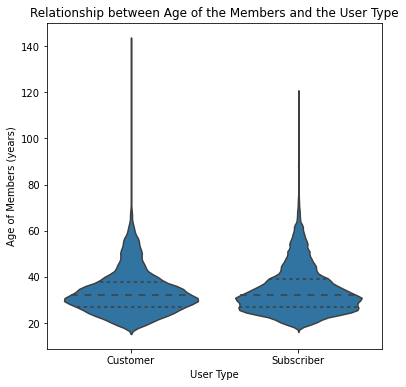

In [180]:
plt.figure(figsize=[6, 6])

sb.violinplot(data=bike_df, x='user_type', y='member_age', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Age of Members (years)');
plt.title('Relationship between Age of the Members and the User Type');

The plot above shows that there isn't much of relationship between the age and the user type.

Let's also look at the relationship between the age of members and the gender of the members.

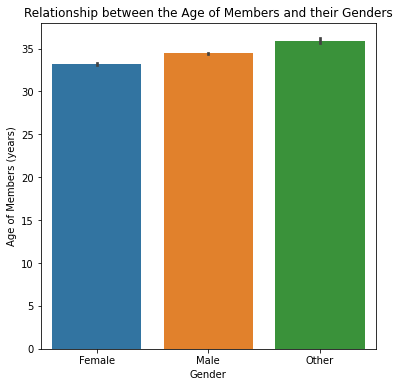

In [181]:
plt.figure(figsize=[6, 6])

sb.barplot(data=bike_df, x='member_gender', y='member_age');
plt.xlabel('Gender');
plt.ylabel('Age of Members (years)');
plt.title('Relationship between the Age of Members and their Genders');

The plot above also shows not much relationship between The age of users and the gender of users.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the relationship between the trip duration and the start and end stations there were stations where the users spent alot of time with the bikes.

> Also, younger people spend more time with the bikes while older people don't. Implying that Age is inversely related to the trip duration.

> Other genders tend to spend more time with bikes while Men spend the least time with bikes.

> Finally, Customers spend more time with the bikes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I didin't observe any interesting relationships between the other features.

## Multivariate Exploration

> In this section, first i will explore the relationship between Member_age, Member_gender and the duration

<Figure size 1440x432 with 0 Axes>

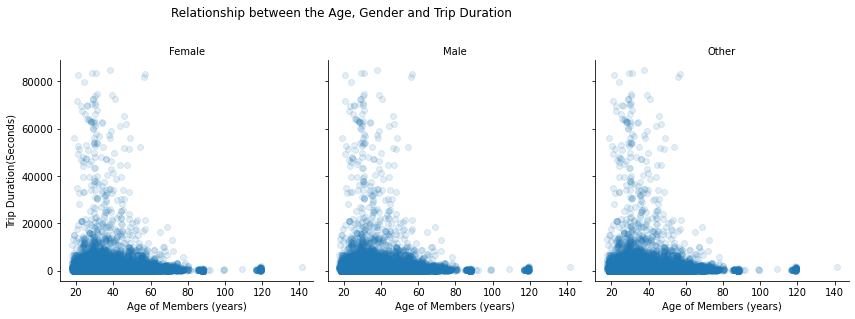

In [182]:
plt.figure(figsize=[20, 6]);

g = sb.FacetGrid(data=bike_df, col='member_gender', height = 4);
g.map(sb.regplot, data=bike_df, x='member_age', y='duration_sec', fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/8});
g.set_titles('{col_name}');
g.set_axis_labels('Age of Members (years)', 'Trip Duration(Seconds)');
plt.suptitle('Relationship between the Age, Gender and Trip Duration', x=0.4, y=1.1);

From the plot above we can see that the relationship between Trip Duration and Age is the same across all the Genders with young people spend more time with the bikes.

Secondly, I will look at the relationship between the duration, the user type and the age.

c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

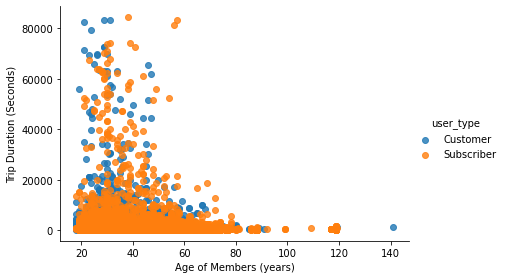

In [183]:
plt.figure(figsize=[20, 5])

g = sb.FacetGrid(data=bike_df, hue='user_type', hue_order=['Customer', 'Subscriber'], size=4, aspect=1.5);
g.map(sb.regplot, 'member_age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Age of Members (years)');
plt.ylabel('Trip Duration (Seconds)');

from the plot above, there seems to be no correlation between the user_type and the other features in the plot.

I will seperate them into different columns to see if there will be any difference.

c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

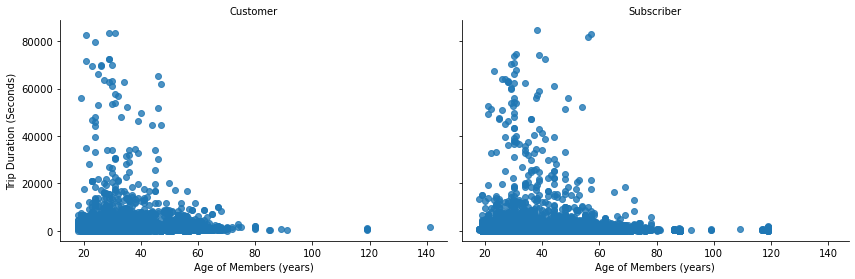

In [184]:
plt.figure(figsize=[20, 5])

g = sb.FacetGrid(data=bike_df, col='user_type', size=4, aspect=1.5);
g.map(sb.regplot, 'member_age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.set_axis_labels('Age of Members (years)', 'Trip Duration (Seconds)');
g.set_titles('{col_name}');

It seems like there is no significant difference between this plot and the previous plot. Therefore, we can conclude that there is no corrolation between the user type and the other features in the plot.

Now, let's use `PairGrid` to look at the overall relationship between the numeric variables and the non-numeric variables.

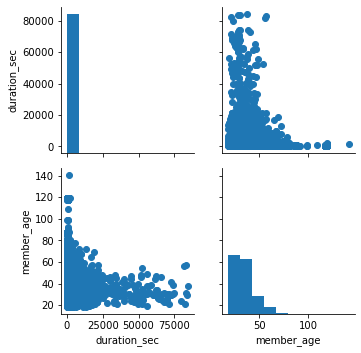

In [185]:
num_var = ['duration_sec', 'member_age']
g = sb.PairGrid(data = bike_df, vars = num_var);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I failed to find any features that strengthened each other.

### Were there any interesting or surprising interactions between features?

> no, there weren't any interesting or suprising interactions.

## Conclusions
> In the course of this data exploration, I performed data wrangling on the dataset where i removed NAN values, performed feature engineering and changed the datatypes of columns inorder to perform data exploration smoothly. After which I began looking at distributions of the main feature (Trip duration) and other features (start and end stations, Age, User Type and Gender) where I discovered interesting information. Then I began to look at relationships between pair variables. Finally, I created plots relating multiple variables.
> In Conclusion, It has been observed that Age, User Type and Gender are variables that affect the Trip Duration greatly. Also, it has been observed that the majority of the users are between 25 - 45.
